# Final Project Report

* Class: DS 5100
* Student Name:
* Student Net ID:
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: [final project repo](https://github.com/rsfellman/ds5100-finalproject-dbm4bj)

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.


```
import pandas as pd   
import numpy as np
        

        
class Die:

    '''
    Create a die with the ability to change the weights of select faces of said die and roll the die, taking into account the weights.
    ---
    
    Methods:
    ---
    __init__:   This is the initializer.
                The user must input a numpy array with faced for the die.
    
    change_weight: Changes the weight of one face of the die.
        

    roll_die:   Rolls the die a given number of times.
                The results for roll_die will change as if the weights for the die are changed.
    
    
    get_current_state: Prints a data frame with the sides of the die as an index and the assigned weights for each side as the data.
    
    ---
    Attributes: 
    faces: NumPy array of the faces for a die.
 
    '''

    def __init__(self, N):
        '''
        Initializer. 
        It sets up the die with a given number of sides and adds a weight of 1 for each side of the die.
        A private dataframe is also created. 
        The private dataframe has the sides of the die as an index and the weights as the data in a column.

        ---
        inputs:
        N:  Faces for a die.  
            N must be a NumPy array with unique values. 
            This method will return errors if those conditions are not met.
        outputs:None
        
        '''
        
        if not isinstance (N, np.ndarray):
            raise TypeError("The N sides must be a NumPy array")
        if len(N) != len(np.unique(N)):
            raise ValueError("The faces must be unique values")
        else:
            self.faces = N
        weights = [1 for _ in range(len(self.faces))]
        self.__die_df = pd.DataFrame({            
            'side': [n for n in self.faces],
            'weights': weights
        })
        self.__die_df_index = self.__die_df.set_index(['side'])

    def change_weight(self, face, new_weight):
        '''
        Changes the weight of one specified side of the die by assigning the new weight to the data frame.
        ---
        inputs:
        face:   The face from your die that you want to change the weight of.
                This must be in the initial NumPy array N.
                This method will throw an error if the face listed is not in the original numpy array N.

        new_weight: This is the new weight you are assigning to a side. 
                    This must be an integer or a float. 
                    An error will be returned if it does not meet those conditions.
        outputs: None
        '''
        
        if face not in self.faces:
            raise IndexError("The face for which the weight is altered needs to be one of the existing faces")
        if not isinstance(new_weight,(float,int)):
            raise TypeError("The new weight must be a float or integer")
        else:
            self.__die_df_index.loc[face]= new_weight

    def roll_dice(self, nrolls=1):
        '''
        Takes a sample of the sides using the assigned weights, and prints the results of the rolls as a list.
        ---
        inputs:
        nrolls: Default set to one unless the user reassigns it. 
                Nrolls should be an integer.
        outputs:
        results: a python list of the results of the rolls
        '''
        
        results = []
        weight = self.__die_df['weights']
        for i in range(nrolls):
            result = self.__die_df.side.sample(weights=weight).values[0].tolist()
            results.append(result)
        return results
    
    def get_current_state(self):
        '''
        Prints a data frame with the sides of the die as an index and the assigned weights for each side as the data.
        ---
        inputs: none
        outputs:
        die_df_index: data frame with the faces of the die as an index and a single column with the assigned weights for each face.
        '''
        
        return self.__die_df_index
    

    
    
class Game:
    '''
    Gives the user the ability to roll one or more similar die. 
    The die should have the same number of sides and associated faces.
    Game is initialized with a python list of one or more dice created from the die class.
    Game gives the user the ability to "roll" the inputed dice a given number of times.
    ---
    Methods:
    __init__:   Initializer. It takes an input of a python list of dice.

    play:   The user calls this method to "roll" the die. The user is able to specify the number of rolls.
            The die are sampled for the number of rolls specified, taking into account the given weights, and the output is stored in a private dataframe.

    show_last_play: Method to see the results of their most recent play.
                    A dataframe of the results is returned.
    ---
    attributes:
    die_list: Python list of dice, where each element of the list is a single die.
    '''
    def __init__(self, dielist):
        '''
        Initializer for the Game class
        ---
        inputs:
        dielist:   Python list of dice created using the Die class.
                    The die in die list should have the same number of sides and associated faces.
        outputs:
        die_list: Python list of dice, where each element of the list is a single die.
        '''
        die_list = list(range(len(dielist)))
        for i in range(len(dielist)):
            die_list[i] = dielist[i].get_current_state()
            
        self.die_list = die_list
    
    def play (self, rolls):
        '''
        Allows user to "roll" the die.
        Samples the faces of the die for a given number of rolls based on the given weights and saves the result in a private dataframe.
        ---
        inputs:
        rolls:  Integer
                Specifies how many time the die should be "rolled"/sampled.
        outputs:none
        '''
        die_weights = list(range(len(self.die_list)))
        for x in range(len(self.die_list)):
            die_weights[x] = list(self.die_list[x]['weights'])

        newlist= list(range(len(self.die_list)))
        for y in range(len(self.die_list)):
            newlist[y] = pd.DataFrame({'side':self.die_list[y].index.tolist(),
                               'die_probs':die_weights[y]})   

        results=  list(range(len(self.die_list)))
        for k in range(len(self.die_list)):
            test = newlist[k]
            results[k] = [test.side.sample(weights=die_weights[k]).values[0].tolist() for i in range(rolls)]
    
        self.__outcome = pd.DataFrame(columns = list(range(len(self.die_list))),
                                index= list(range(rolls)),
                                data = []
                                 )
        length =  len(self.__outcome.columns)
        for col in range(length):
            self.__outcome[col] = results[col]
        self.__outcome.index.name = 'roll_number'

    def show_last_play (self, format = "wide"):
        ''' 
        Used to see the results of the most recent play. 
        Returns the private dataframe created by the play class.
        The data can be returned in 'narrow' or 'wide' format and an error will be raised if a different format is supplied by the user.
        ---
        inputs:
        format: "narrow" or "wide"
                Format defaults to wide but the user can choose to have the data presented in narrow format by entering "narrow".
        outputs:
        last_play:  Dataframe of the results of the most recent play. 
                    Can be in either wide or narrow format.
        '''
        if format == "wide":
            last_play = self.__outcome
            return last_play
        if format == "narrow":
            last_play = pd.DataFrame(self.__outcome.unstack())
            last_play.index = last_play.index.reorder_levels(order=[1, 0])
            last_play.index.names = ['roll_number', 'die_number']
            return last_play
        else:
            raise ValueError(f"{format} is not an acceptable format. Please enter 'narrow' or 'wide'")
             
    


class Analyzer:
    ''' 
    Takes the results of a game played via the Game class and computes statistics about said game.
    ---
    methods:
    __init__:   Initializer. It takes in an instance of the Game class.
                If the input is not an instance of the Game class, a ValueError will be raised.
                A dataframe named data is created. Data holds the information for the last play from the game class.

    count_jackpots: A jackpot is when all the faces for a given roll are the same.
                    The count_jackpots method counts the number of times a game resulted in a jackpot and returns an integer.

    count_faces:    Calculates the number of times a given face is returned for a roll.
                    A dataframe of the results is returned.

    count_combos:    Counts the number of distinct combinations among the rolls.
                    A distinct combination is order-independent and can included repetitions.
                    A data frame of the combinations and associated counts is returned.

    count_permutations:  Counts the number of disinct permutations among the rolls.
                        A distinct permutation is order-dependent and can include repetitions.
                        A data frame of the permutations and counts is returned.
    ---
    attributes:
    data: a data frame of the last play.

    '''  
    def __init__(self, game):
        ''' 
        Initializer. Takes in a an instance of the Game class. 
        From the input of the game class the method show_last_play is called to create a data frame of the the last play.
        ---
        inputs:
        game:   A Game object/instnace of the game class.
                If game is not a Game object, a ValueError will be raised.
        outputs: 
        data: Data frame of the last play.
        '''
        if not isinstance(game, Game):
            raise ValueError("This is not a Game object. Please input a Game object.")
        else:
            self.data = game.show_last_play()

    def count_jackpots(self):
        ''' 
        Calculates the number of times a game resulted in a jackpot and returns and integer.
        A jackpot is when all the faces for a given roll are the same.
        For each row of the data, this method finds the number of unique values. If the number of unique values is greater than 1, that roll was not a jackpot.
        For each row where the number of unique values is equal to one, the jackpot count goes up by one.
        ---
        inputs:none
        outputs: 
        jack_count: integer, the number of jackpots
        '''
        jack_count = 0
        for i in range(len(self.data)):
            if len(self.data.iloc[i].unique()) == 1:
                jack_count += 1
            else:
                jack_count = jack_count
        return jack_count
    
    def count_faces(self):
        ''' 
        Counts the number of times a given face appears in one roll using the value_counts() method with a lambda function.
        The lambda function is the applied across the data frame to calculate the face counts for each roll.
        ---
        inputs: none
        outputs: 
        face_count: Data frame with roll number as the index, faces as the columns and counts for each face appearance as the data.
        '''
        row_count = lambda row: row.value_counts()
        face_count = self.data.apply(row_count, axis = 1).fillna(0).astype(int)
        return face_count
    
    def count_combos(self):
        ''' 
        This method calculates the distinct combination of faces rolled and their counts.
        A distinct combination is not dependent on order and may have repetitions.
        ---
        inputs: none
        outputs: 
        combo_count_df: Dataframe with a MultiIndex of distinct combinations and a single column for the associated counts.
        '''
        row_combos = self.data.apply(lambda row: tuple(sorted(row)), axis = 1)
        combo_count = row_combos.value_counts()
        combo_count_df = pd.DataFrame(combo_count)
        combo_count_df.index = pd.MultiIndex.from_tuples(combo_count_df.index)
        return combo_count_df
    
    def count_permutations(self):
        ''' 
        Calculates the distinct permutations of faces rolled in a game and their counts.
        A permutaiton is dependent on order and may contain repetitions.
        ---
        inputs:none
        outputs:
        perm_count_df: Datareame with a MultiIndex of distinct permutations and a column for the associated counts.
        '''
        row_perm = self.data.apply(lambda row: tuple(row), axis = 1)
        perm_count = row_perm.value_counts()
        perm_count_df = pd.DataFrame(perm_count)
        perm_count_df.index = pd.MultiIndex.from_tuples(perm_count_df.index)
        return perm_count_df


## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```   

import pandas as pd
import numpy as np
from montecarlo.montecarlo import Die
from montecarlo.montecarlo import Game
from montecarlo.montecarlo import Analyzer
import unittest

class DieTestSuite(unittest.TestCase):
    '''
    Tests the methods in the Die class unsing unittest.

    Methods:
    test_01_initializer: Tests if a numpy array of the faces is created/stored
    test_02_change_weight: Checks to see if the new weight is stored in the data frame with the correct side.
    test_03_roll_die: Tests if the results are a list containing faces of the die.
    test_04_get_current_state: Tests if the outcome of this method is a dataframe with a column for wieghts.
    '''
    def test_01_initializer(self):
        '''
        Tests if a numpy array of the faces is created/stored from an instance of the Die class.
        '''
        die1 = [1,2,3,4,5,6]
        die_arr = np.array(die1)
        mydie = Die(die_arr)
        self.assertIsInstance(mydie.faces, np.ndarray)

    def test_02_change_weight(self):
        '''
        Checks to see if the new weight is stored in the data frame with the correct side.
        '''
        die1 = [1,2,3,4,5,6]
        die_arr = np.array(die1)
        mydie = Die(die_arr)
        face = 2
        weight = 100
        mydie.change_weight(face,weight)
        die_weight = mydie.get_current_state()
        self.assertEqual(100, die_weight.loc[face, 'weights'])

    def test_03_roll_dice(self):
        '''
        Tests if the results are a list containing faces of the die.
        This is done using the all method to see if the results are in our originial list of die faces and isinstance to make sure it is a list.
        '''
        die1 = [1,2,3,4,5,6]
        die_arr = np.array(die1)
        mydie = Die(die_arr)
        myroll = mydie.roll_dice(10)
        self.assertTrue(all(e in die1 for e in myroll)& isinstance(myroll,list))

    def test_04_get_current_state(self):
        '''
        Tests if the outcome of this method is a dataframe with a column for weights.
        '''
        die1 = [1,2,3,4,5,6]
        die_arr = np.array(die1)
        mydie = Die(die_arr)
        current_die = mydie.get_current_state()
        self.assertTrue(isinstance(current_die,pd.DataFrame) & (current_die.columns == 'weights'))


class GameTestSuite(unittest.TestCase):
    '''
    Tests to make sure the Game class is functioning as expected.
    ---
    Methods:
    test_05_initializer: Tests to make sure our initializer creates the attribute for the game class correctly.
    test_06_play: Tests to see if the play method correctly sampled the dice for a given number of rolls.
    test_07_show_last_play: Tests to make sure the output of the show_last_play method is a dataframe.
    '''
    def test_05_initializer(self):
        '''
        Tests to make sure our initializer creates the attribute for the game class correctly.
        '''
        dice = [1,2,3,4]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        die1_state = die1.get_current_state()
        die2_state = die2.get_current_state()
        die3_state = die3.get_current_state()
        die4_state = die4.get_current_state()
        dice_list_weights = [die1_state, die2_state, die3_state, die4_state]
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        self.assertEqual(dice_list_weights, mygame.die_list)

    def test_06_play(self):
        '''
        Tests to see if the play method correctly sampled the dice for a given number of rolls.
        '''
        dice = [1,2,3,4]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        nrolls = 10
        mygame.play(nrolls)
        self.assertTrue(nrolls == len(mygame.show_last_play()))
    
    def test_07_show_last_play(self):
        '''
        Tests to make sure the output of the show_last_play method is a dataframe.
        '''
        dice = [1,2,3,4]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        nrolls = 10
        mygame.play(nrolls)
        myplay = mygame.show_last_play()
        self.assertIsInstance(myplay, pd.DataFrame)


class AnalyzerTestSuite(unittest.TestCase):
    '''
    A series of unittests to make sure the Analyzer class is functioning as expected.
    ---
    Methods:
    test_08_initializer: Tests that the attribute "data" created is a dataframe.
    test_09_count_jackpots: Tests that the number of jackpots is counted correctly and returned as an integer.
    test_10_count_faces: Tests if the count_faces method correctly counts the number of faces.
    test_11_count_combos: Tests to see if the output of the count_combos method is a dataframe with a MultiIndex.
    test_12_count_permutations: Tests the the output of the count_permutations method is a dataframe with a MultiIndex.

    
    '''
    def test_08_initializer(self):
        '''
        Tests that the attribute data created is a dataframe.
        '''
        dice = [1,2,3,4]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        nrolls = 10
        mygame.play(nrolls)
        myanalyzer = Analyzer(mygame)
        mydata = myanalyzer.data
        self.assertIsInstance(mydata, pd.DataFrame)

    def test_09_count_jackpots(self):
        '''
        Tests that the number of jackpots is counted correctly and returned as an integer.
        This test will set every die to have one face so every roll should be a jackpot.
        For the purpose of this test, we ignore the fact that it is imposible to have a one sided die unless it is a mobius strip of some sort.
        '''
        dice = [1]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        nrolls = 10
        mygame.play(nrolls)
        myanalyzer = Analyzer(mygame)
        self.assertTrue((myanalyzer.count_jackpots() == nrolls) & (isinstance(myanalyzer.count_jackpots(), int)))


    def test_10_count_faces(self):
        '''
        Tests if the count_faces method correctly counts the number of faces.
        Ignoring reality once again, we will have one sided dice, so the face count for each roll should be equal to the number of dice rolled, in this case 4.
        This test will also confirm that the output is a dataframe.
        '''
        dice = [1]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        nrolls = 10
        mygame.play(nrolls)
        myanalyzer = Analyzer(mygame)
        num_dice = 4
        face_counts = myanalyzer.count_faces().loc[0].tolist()
        self.assertTrue((face_counts[0]== num_dice) & (isinstance(myanalyzer.count_faces(), pd.DataFrame)))

    def test_ll_count_combos(self):
        '''
        Tests to see if the output of the count_combos method is a dataframe with a MultiIndex by calculating the numbers of levels in the index.
        '''
        dice = [1,2,3,4]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        nrolls = 10
        mygame.play(nrolls)
        myanalyzer = Analyzer(mygame)
        mycombos = myanalyzer.count_combos()
        self.assertTrue((mycombos.index.nlevels > 1) & isinstance(mycombos, pd.DataFrame))


    def test_12_count_permutations(self):
        '''
        Tests the the output of the count_permutations method is a dataframe with a MultiIndex.
        The MultiIndex is tested by counding the number of levels in the index.
        '''

        dice = [1,2,3,4]
        dice_arr = np.array(dice)
        die1 = Die(dice_arr)
        die2 = Die(dice_arr)
        die3 = Die(dice_arr)
        die4 = Die(dice_arr)
        dice_list = [die1, die2, die3, die4]
        mygame = Game(dice_list)
        nrolls = 10
        mygame.play(nrolls)
        myanalyzer = Analyzer(mygame)
        mypermutations = myanalyzer.count_permutations()
        self.assertTrue((mypermutations.index.nlevels > 1) & isinstance(mypermutations, pd.DataFrame))


if __name__ == '__main__':
    unittest.main()
```   


## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
test_08_initializer (__main__.AnalyzerTestSuite.test_08_initializer)
this tests that the attribute data created is a dataframe. ... ok
test_09_count_jackpots (__main__.AnalyzerTestSuite.test_09_count_jackpots)
This tests that the number of jackpots is counted correctly and returned as an integer. ... ok
test_10_count_faces (__main__.AnalyzerTestSuite.test_10_count_faces)
This tests if the count_faces method correctly counts the number of faces. ... ok
test_12_count_permutations (__main__.AnalyzerTestSuite.test_12_count_permutations)
This tests the the output of the count_permutations method is a dataframe with a MultiIndex. ... ok
test_ll_count_combos (__main__.AnalyzerTestSuite.test_ll_count_combos)
This tests to see if the output of the count_combos method is a dataframe with a MultiIndex by calculating the numbers of levels in the index. ... ok
test_01_initializer (__main__.DieTestSuite.test_01_initializer)
This tests if a numpy array of the faces is created/stored ... ok
test_02_change_weight (__main__.DieTestSuite.test_02_change_weight)
checks to see if the new weight is stored in the data frame with the correct side. ... ok
test_03_roll_dice (__main__.DieTestSuite.test_03_roll_dice)
Tests if the results are a list containing faces of the die. ... ok
test_04_get_current_state (__main__.DieTestSuite.test_04_get_current_state)
This tests if the outcome of this method is a dataframe with a column for wieghts. ... ok
test_05_initializer (__main__.GameTestSuite.test_05_initializer)
This tests to make sure our initializer creates and attribute which is equal to out input for an instance of the Game class. ... ok
test_06_play (__main__.GameTestSuite.test_06_play)
this tests to see if the play method correctly sampled the dice for a given number of rolls. ... ok
test_07_show_last_play (__main__.GameTestSuite.test_07_show_last_play)
This tests to make sure the output of the show_last_play method is a dataframe. ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.092s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo.montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Takes the results of a game played via the Game class and computes statistics about said game.
     |  ---
     |  methods:
     |  __init__:   Initializer. It takes in an instance of the Game class.
     |              If the input is not an instance of the Game class, a ValueError will be raised.
     |              A dataframe named data is created. Data holds the information for the last play from the game class.
     |  
     |  count_jackpots: A jackpot is when all the faces for a given roll are the same.
     |                  The count_jackpots method counts the number of times a game resulted in a jackpot and returns an integer.
     |  
     |  count_faces:    Calculates the number of times a given face is returned for a roll.
     |          

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: [Link to README](https://github.com/rsfellman/ds5100-finalproject-dbm4bj/blob/main/README.md)

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [3]:
pip install -e.

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/dbm4bj/docs/msds/ds5100/ds5100-finalproject-dbm4bj
  Preparing metadata (setup.py) ... done
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 1.0.0
    Uninstalling montecarlo-1.0.0:
      Successfully uninstalled montecarlo-1.0.0
  Running setup.py develop for montecarlo
Note: you may need to restart the kernel to use updated packages.


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
import numpy as np
import pandas as pd

In [5]:
coin = np.array(['H','T'])
unfair = montecarlo.Die(coin)
fair = montecarlo.Die(coin)
unfair.change_weight('H', 5)
fair.get_current_state()

,weights
side,
H,1
T,1


In [6]:
unfair.get_current_state()

,weights
side,
H,5
T,1


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [7]:
#create die list for game class from fair die
die_list = [fair]*2

In [8]:
#create game instance and use play method
coingame = montecarlo.Game(die_list)
coingame.play(1000)
coingame.show_last_play()

,0,1
roll_number,,
0,T,T
1,H,H
2,T,H
3,H,T
4,H,H
...,...,...
995,T,T
996,H,T
997,T,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
die_list2 = [fair, unfair, unfair]
coingame2 = montecarlo.Game(die_list2)
coingame2.play(1000)
coingame2.show_last_play()

,0,1,2
roll_number,,,
0,T,H,H
1,H,T,H
2,T,H,H
3,T,H,H
4,T,T,H
...,...,...,...
995,T,H,H
996,H,H,H
997,H,T,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [10]:
coin_analyze = montecarlo.Analyzer(coingame)
coin_analyze2 = montecarlo.Analyzer(coingame2)
jackpot1 = coin_analyze.count_jackpots()
jackpot2 = coin_analyze2.count_jackpots()
print("Number of jackpots for 2 coin game:", jackpot1)
print("Number of jackpots for 3 coin game:", jackpot2)

Number of jackpots for 2 coin game: 504
Number of jackpots for 3 coin game: 368


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [11]:
relative_freq1 = jackpot1/1000
relative_freq2 = jackpot2/1000
print("The relative frequency of jackpots for the 2 coin game is", relative_freq1)
print("The realtive frequency of jackpots for the 3 coin game is", relative_freq2)

The relative frequency of jackpots for the 2 coin game is 0.504
The realtive frequency of jackpots for the 3 coin game is 0.368


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0, 0.5, 'Relative Frequency')

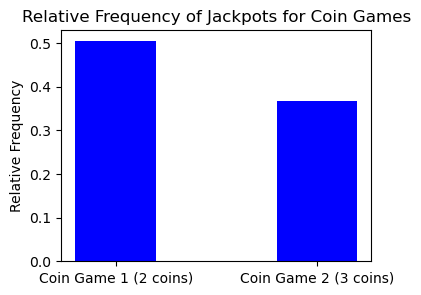

In [12]:
import matplotlib.pyplot as plt

freqs = ["Coin Game 1 (2 coins)", "Coin Game 2 (3 coins)"]
values = [relative_freq1, relative_freq2]
figure = plt.figure(figsize = (4,3))
plt.bar(freqs, values, color ='blue', 
        width = 0.4)
plt.title("Relative Frequency of Jackpots for Coin Games")
plt.ylabel("Relative Frequency")

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [13]:
die = np.array([1,2,3,4,5,6])
die1 = montecarlo.Die(die)
die2 = montecarlo.Die(die)
die3 = montecarlo.Die(die)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [14]:
die1.change_weight(6,5)
die1.get_current_state()

,weights
side,
1,1
2,1
3,1
4,1
5,1
6,5


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [15]:
die2.change_weight(1,5)
die2.get_current_state()

,weights
side,
1,5
2,1
3,1
4,1
5,1
6,1


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
fair_dice_list = [die3]*5
game1 = montecarlo.Game(fair_dice_list)
game1.play(10000)
game1.show_last_play()

,0,1,2,3,4
roll_number,,,,,
0,6,3,1,3,4
1,6,6,1,2,3
2,6,4,4,5,2
3,1,6,6,3,6
4,6,3,5,5,6
...,...,...,...,...,...
9995,5,2,1,6,6
9996,6,6,5,5,4
9997,3,5,1,3,1


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [17]:
unfair_dice_list = [die1, die2, die3, die3, die3]
game2 = montecarlo.Game(unfair_dice_list)
game2.play(10000)
game2.show_last_play()

,0,1,2,3,4
roll_number,,,,,
0,6,4,6,6,5
1,6,6,4,2,3
2,6,4,6,6,4
3,6,6,1,3,1
4,6,2,6,3,3
...,...,...,...,...,...
9995,6,3,5,2,5
9996,6,1,5,5,2
9997,2,5,4,2,2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [18]:
analyze1 = montecarlo.Analyzer(game1)
analyze2 = montecarlo.Analyzer(game2)
jackpot_dice1 = analyze1.count_jackpots()
jackpot_dice2 = analyze2.count_jackpots()
relative_freq_dice1 = jackpot_dice1/10000
relative_freq_dice2 = jackpot_dice2/10000
print("The relative frequency of jackpots for the fair dice game is" , relative_freq_dice1)
print("The realtive frequency of jackpots for the unfair dice game is", relative_freq_dice2)

The relative frequency of jackpots for the fair dice game is 0.0004
The realtive frequency of jackpots for the unfair dice game is 0.0004


Text(0, 0.5, 'Relative Frequency')

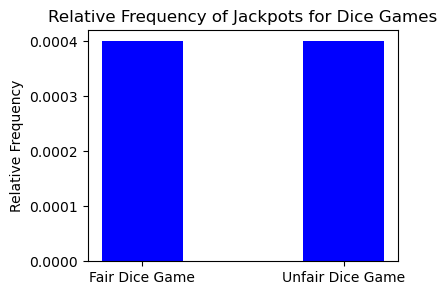

In [19]:
#graph relative frequencies
freqs = ["Fair Dice Game", "Unfair Dice Game"]
values = [relative_freq_dice1, relative_freq_dice2]
figure = plt.figure(figsize = (4,3))
plt.bar(freqs, values, color ='blue', 
        width = 0.4)
plt.title("Relative Frequency of Jackpots for Dice Games")
plt.ylabel("Relative Frequency")

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [20]:
alphabet = pd.read_fwf("english_letters.txt",
            widths=[1,11],
            header = None)
alpha_list = list(alphabet[0])
value_list = alphabet[1].tolist()
letters_arr = np.array(alpha_list)
#call die class
letter_die = montecarlo.Die(letters_arr)

In [21]:
for i in range(len(alphabet)):
    letter_die.change_weight(alpha_list[i], value_list[i])
letter_die.get_current_state()

,weights
side,
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [22]:
letter_dice_list = [letter_die]*4
letter_game = montecarlo.Game(letter_dice_list)
letter_game.play(1000)
letter_game.show_last_play()

,0,1,2,3
roll_number,,,,
0,E,R,N,I
1,S,L,E,T
2,H,C,D,A
3,H,Y,I,E
4,U,G,C,L
...,...,...,...,...
995,A,M,S,T
996,K,D,M,Y
997,E,A,N,A


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [23]:
#read in scrabble words and convert it to a list
words = pd.read_csv("scrabble_words.txt",
                    header=None)
word_list = words[0].tolist()

In [24]:
#use analyzer class to get the permutations
word_analyzer = montecarlo.Analyzer(letter_game)
word_permutation_count = word_analyzer.count_permutations()
word_permutation_count

,,,,count
E,T,E,I,2
T,E,A,T,2
R,B,O,E,2
I,O,T,T,2
L,R,I,I,2
...,...,...,...,...
S,E,O,W,1
H,N,P,A,1
T,E,O,E,1
R,A,O,R,1


In [25]:
print("There are", len(word_permutation_count), "permutations in the word game with 4 dice." )

There are 995 permutations in the word game with 4 dice.


In [26]:
#convert multiindex from permutation dataframe to list of strings
perms = pd.MultiIndex.to_flat_index(word_permutation_count.index)
perm_strings = list(range(len(word_permutation_count)))
for z in range(len(perms)):
    perm_strings[z] = perms[z][0]+perms[z][1]+perms[z][2]+perms[z][3]

In [27]:
#use for loop to get word count for words found in the permutations
word_count= 0 
for x in range(len(perm_strings)):
    if perm_strings[x] in word_list:
        word_count += 1
    else:
        word_count+=0
word_count

50

In [28]:
#get count permutations vs words found
diff = len(word_permutation_count) - word_count
print("There are", word_count, "unique words out of", len(word_permutation_count), "permutations.", diff, "of the permutations are not words.")

There are 50 unique words out of 995 permutations. 945 of the permutations are not words.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [29]:
#play game with 5 dice
letter_dice_list2 = [letter_die]*5
letter_game2 = montecarlo.Game(letter_dice_list2)
letter_game2.play(1000)

In [30]:
#count the permutations
word_analyzer2 = montecarlo.Analyzer(letter_game2)
word_permutation_count2 = word_analyzer2.count_permutations()
word_permutation_count2

count
S T E H F      1
E N S O S      1
C I N E O      1
O D N F N      1
A E U L D      1
...          ...
S T L Y E      1
  R I A G      1
P E E N S      1
A T O E F      1
E R C S L      1

[1000 rows x 1 columns]

In [31]:
print("There are", len(word_permutation_count2), "permutations in the word game with 5 dice." )

There are 1000 permutations in the word game with 5 dice.


In [32]:
#turn multiindex into list of strings so we can search for words
perms2 = pd.MultiIndex.to_flat_index(word_permutation_count2.index)
perm_strings2 = list(range(len(word_permutation_count2)))
for z in range(len(perms2)):
    perm_strings2[z] = perms2[z][0]+perms2[z][1]+perms2[z][2]+perms2[z][3]+perms2[z][4]

In [33]:
#use for loop to look for permutations in the scrabble words list
word_count2= 0 
for x in range(len(perm_strings2)):
    if perm_strings2[x] in word_list:
        word_count2 += 1
    else:
        word_count2+=0
word_count2

7

In [34]:
#get difference between permutations and words
diff2 = len(word_permutation_count2) - word_count2
print("There are", word_count2, "unique words out of", len(word_permutation_count2), "permutations.", diff2, "of the permutations are not words.")

There are 7 unique words out of 1000 permutations. 993 of the permutations are not words.


In [35]:
#compare number of words found in game with 4 dice to game with 5 dice
if word_count>word_count2:
    print("More words are found in the game with 4 dice than in the game with 5.")
elif word_count2>word_count:
    print("More words are found in the game with 5 dice than in the game with 4.")
else:
    print("Equal numbers of words were found in both games.")

More words are found in the game with 4 dice than in the game with 5.
